Notebook for training the ground-truth model, $\mathbb{E}[y \mid \mathbf{x}]$, used in the superconductor design experiments (see Supplementary Material S4.1).

In [1]:
import numpy as np
from xgboost import XGBRegressor  # using xgboost version 0.90
from sklearn.feature_selection import SelectFromModel
import util

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("notebook");
sns.set_style("darkgrid");

Load preprocessed Hamidieh (2018) dataset.
Download link: https://archive.ics.uci.edu/ml/datasets/Superconductivty+Data

In [2]:
d = np.load("preprocessed_data.npz")
X_nxm = d["X_nxm"]  # zero-mean unit-variance features from Hamidieh (2018) dataset
labels_n = d["y_n"]  # original labels from Hamidieh (2018) dataset
print("X_nxm shape: {}".format(X_nxm.shape))
print("labels_n shape: {}".format(labels_n.shape))

X_nxm shape: (21263, 81)
labels_n shape: (21263,)


Train boosted regression trees using all features.

In [3]:
gtfs = XGBRegressor(**util.XGB_PARAMS)
n_train = int(0.8 * labels_n.size)
Xtr_nxm, Xval_nxm = X_nxm[: n_train, :], X_nxm[n_train :, :]
labelstr_n, labelsval_n = labels_n[: n_train], labels_n[n_train :]
gtfs.fit(Xtr_nxm, labelstr_n,
         eval_set=[(Xtr_nxm, labelstr_n), (Xval_nxm, labelsval_n)],
        eval_metric="rmse", early_stopping_rounds=20, verbose=2)

[0]	validation_0-rmse:43.7857	validation_1-rmse:43.7541
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 20 rounds.
[2]	validation_0-rmse:36.1684	validation_1-rmse:36.3246
[4]	validation_0-rmse:29.9773	validation_1-rmse:30.3142
[6]	validation_0-rmse:24.9634	validation_1-rmse:25.6012
[8]	validation_0-rmse:20.918	validation_1-rmse:21.8048
[10]	validation_0-rmse:17.6586	validation_1-rmse:18.8135
[12]	validation_0-rmse:15.0133	validation_1-rmse:16.463
[14]	validation_0-rmse:12.9122	validation_1-rmse:14.6432
[16]	validation_0-rmse:11.2449	validation_1-rmse:13.2904
[18]	validation_0-rmse:9.90956	validation_1-rmse:12.2307
[20]	validation_0-rmse:8.86969	validation_1-rmse:11.4802
[22]	validation_0-rmse:8.07813	validation_1-rmse:10.8921
[24]	validation_0-rmse:7.42922	validation_1-rmse:10.4703
[26]	validation_0-rmse:6.95646	validation_1-rmse:10.1593
[28]	validation_0-rmse:6.55927	validation_1-rmse:9

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, eta=0.02,
             eval_metric=['rmse', 'mae'], gamma=0, importance_type='gain',
             learning_rate=0.1, max_delta_step=0, max_depth=16,
             min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
             nthread=None, objective='reg:squarederror', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.5, verbose=2, verbosity=1)

Select top 60 features

In [4]:
selection = SelectFromModel(gtfs, threshold=-np.inf, max_features=60, prefit=True)
X_nxm = selection.transform(X_nxm)
print("X_nxm shape: {}".format(X_nxm.shape))

X_nxm shape: (21263, 60)


Train boosted regression trees on top 60 features

In [5]:
gt = XGBRegressor(**util.XGB_PARAMS)
Xtr_nxm, Xval_nxm = X_nxm[: n_train, :], X_nxm[n_train :, :]
labelstr_n, labelsval_n = labels_n[: n_train], labels_n[n_train :]
gt.fit(Xtr_nxm, labelstr_n,
       eval_set=[(Xtr_nxm, labelstr_n), (Xval_nxm, labelsval_n)],
       eval_metric="rmse", early_stopping_rounds=20, verbose=2)

[0]	validation_0-rmse:43.7913	validation_1-rmse:43.7459
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 20 rounds.
[2]	validation_0-rmse:36.1669	validation_1-rmse:36.244
[4]	validation_0-rmse:29.9711	validation_1-rmse:30.2596
[6]	validation_0-rmse:24.9728	validation_1-rmse:25.466
[8]	validation_0-rmse:20.9334	validation_1-rmse:21.6914
[10]	validation_0-rmse:17.6658	validation_1-rmse:18.7082
[12]	validation_0-rmse:15.0288	validation_1-rmse:16.3506
[14]	validation_0-rmse:12.9308	validation_1-rmse:14.5637
[16]	validation_0-rmse:11.2727	validation_1-rmse:13.177
[18]	validation_0-rmse:9.93308	validation_1-rmse:12.1169
[20]	validation_0-rmse:8.90147	validation_1-rmse:11.3728
[22]	validation_0-rmse:8.11595	validation_1-rmse:10.8054
[24]	validation_0-rmse:7.46857	validation_1-rmse:10.3947
[26]	validation_0-rmse:6.9956	validation_1-rmse:10.0968
[28]	validation_0-rmse:6.59819	validation_1-rmse:9.8

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, eta=0.02,
             eval_metric=['rmse', 'mae'], gamma=0, importance_type='gain',
             learning_rate=0.1, max_delta_step=0, max_depth=16,
             min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
             nthread=None, objective='reg:squarederror', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.5, verbose=2, verbosity=1)

In [6]:
gt_n = gt.predict(X_nxm)
gt.save_model("gt_dim60.model")
np.savez('data_dim60.npz', X_nxm=X_nxm, labels_n=labels_n, gt_n=gt_n)

# evaluate effect of feature selection

In [45]:
d = np.load("preprocessed_data.npz")
X_nxm = d["X_nxm"]  # zero-mean unit-variance features from Hamidieh (2018) dataset
labels_n = d["y_n"]  # original labels from Hamidieh (2018) dataset
print("X_nxm shape: {}".format(X_nxm.shape))
print("labels_n shape: {}".format(labels_n.shape))

X_nxm shape: (21263, 81)
labels_n shape: (21263,)


Train ground-truth model using all features

In [36]:
gtfs = XGBRegressor(**util.XGB_PARAMS)
n_train = int(0.8 * labels_n.size)
n_tr = int(0.8 * n_train)
Xtr_nxm, Xval_nxm = X_nxm[: n_tr, :], X_nxm[n_tr : n_train, :]
labelstr_n, labelsval_n = labels_n[: n_tr], labels_n[n_tr : n_train]
gtfs.fit(Xtr_nxm, labelstr_n,
         eval_set=[(Xtr_nxm, labelstr_n), (Xval_nxm, labelsval_n)],
         eval_metric="rmse", early_stopping_rounds=20, verbose=2)

[0]	validation_0-rmse:43.8427	validation_1-rmse:43.8101
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 20 rounds.
[2]	validation_0-rmse:36.2494	validation_1-rmse:36.4815
[4]	validation_0-rmse:30.0875	validation_1-rmse:30.5693
[6]	validation_0-rmse:25.0548	validation_1-rmse:25.862
[8]	validation_0-rmse:21.032	validation_1-rmse:22.1694
[10]	validation_0-rmse:17.7304	validation_1-rmse:19.2192
[12]	validation_0-rmse:15.098	validation_1-rmse:16.9719
[14]	validation_0-rmse:12.9925	validation_1-rmse:15.2645
[16]	validation_0-rmse:11.3067	validation_1-rmse:13.9292
[18]	validation_0-rmse:9.96404	validation_1-rmse:12.945
[20]	validation_0-rmse:8.87486	validation_1-rmse:12.2101
[22]	validation_0-rmse:8.01833	validation_1-rmse:11.6851
[24]	validation_0-rmse:7.35011	validation_1-rmse:11.2656
[26]	validation_0-rmse:6.87903	validation_1-rmse:10.9664
[28]	validation_0-rmse:6.48762	validation_1-rmse:10.

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, eta=0.02,
             eval_metric=['rmse', 'mae'], gamma=0, importance_type='gain',
             learning_rate=0.1, max_delta_step=0, max_depth=16,
             min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
             nthread=None, objective='reg:squarederror', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.5, verbose=2, verbosity=1)

Evaluate RMSE on hold-out data

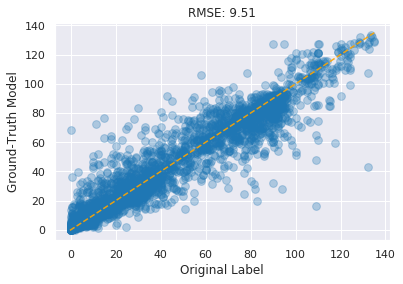

In [40]:
gt_n = gtfs.predict(X_nxm[n_train :])
plt.scatter(labels_n[n_train :], gt_n, s=60, alpha=0.3)
plt.xlabel('Original Label'); plt.ylabel('Ground-Truth Model');
util.plot_xy(labels_n[n_train :], gt_n)
plt.title('RMSE: {:.2F}'.format(util.rmse(labels_n[n_train :], gt_n)));

Repeat with top 60 features

In [41]:
selection = SelectFromModel(gtfs, threshold=-np.inf, max_features=60, prefit=True)
X_nxm = selection.transform(X_nxm)
print("X_nxm shape: {}".format(X_nxm.shape))

X_nxm shape: (21263, 60)


In [42]:
gt = XGBRegressor(**util.XGB_PARAMS)
Xtr_nxm, Xval_nxm = X_nxm[: n_tr, :], X_nxm[n_tr : n_train, :]
labelstr_n, labelsval_n = labels_n[: n_tr], labels_n[n_tr : n_train]
gt.fit(Xtr_nxm, labelstr_n,
       eval_set=[(Xtr_nxm, labelstr_n), (Xval_nxm, labelsval_n)],
       eval_metric="rmse", early_stopping_rounds=20, verbose=2)

[0]	validation_0-rmse:43.834	validation_1-rmse:43.8286
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 20 rounds.
[2]	validation_0-rmse:36.2405	validation_1-rmse:36.4712
[4]	validation_0-rmse:30.0654	validation_1-rmse:30.5539
[6]	validation_0-rmse:25.0327	validation_1-rmse:25.8151
[8]	validation_0-rmse:21.0022	validation_1-rmse:22.0744
[10]	validation_0-rmse:17.7186	validation_1-rmse:19.1257
[12]	validation_0-rmse:15.1011	validation_1-rmse:16.8812
[14]	validation_0-rmse:12.982	validation_1-rmse:15.1165
[16]	validation_0-rmse:11.2821	validation_1-rmse:13.7442
[18]	validation_0-rmse:9.91184	validation_1-rmse:12.7387
[20]	validation_0-rmse:8.82826	validation_1-rmse:12.0234
[22]	validation_0-rmse:8.01555	validation_1-rmse:11.4802
[24]	validation_0-rmse:7.348	validation_1-rmse:11.0496
[26]	validation_0-rmse:6.8525	validation_1-rmse:10.7427
[28]	validation_0-rmse:6.46241	validation_1-rmse:10.5

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, eta=0.02,
             eval_metric=['rmse', 'mae'], gamma=0, importance_type='gain',
             learning_rate=0.1, max_delta_step=0, max_depth=16,
             min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
             nthread=None, objective='reg:squarederror', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.5, verbose=2, verbosity=1)

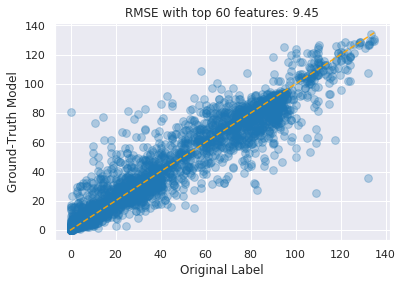

In [44]:
gt_n = gt.predict(X_nxm[n_train :])
plt.scatter(labels_n[n_train :], gt_n, s=60, alpha=0.3)
plt.xlabel('Original Label'); plt.ylabel('Ground-Truth Model');
util.plot_xy(labels_n[n_train :], gt_n)
plt.title('RMSE with top 60 features: {:.2F}'.format(util.rmse(labels_n[n_train :], gt_n)));